# Passavudhi Samrankase

## Analyzing and Predicting Football Player Performance Metrics per 90 Minutes

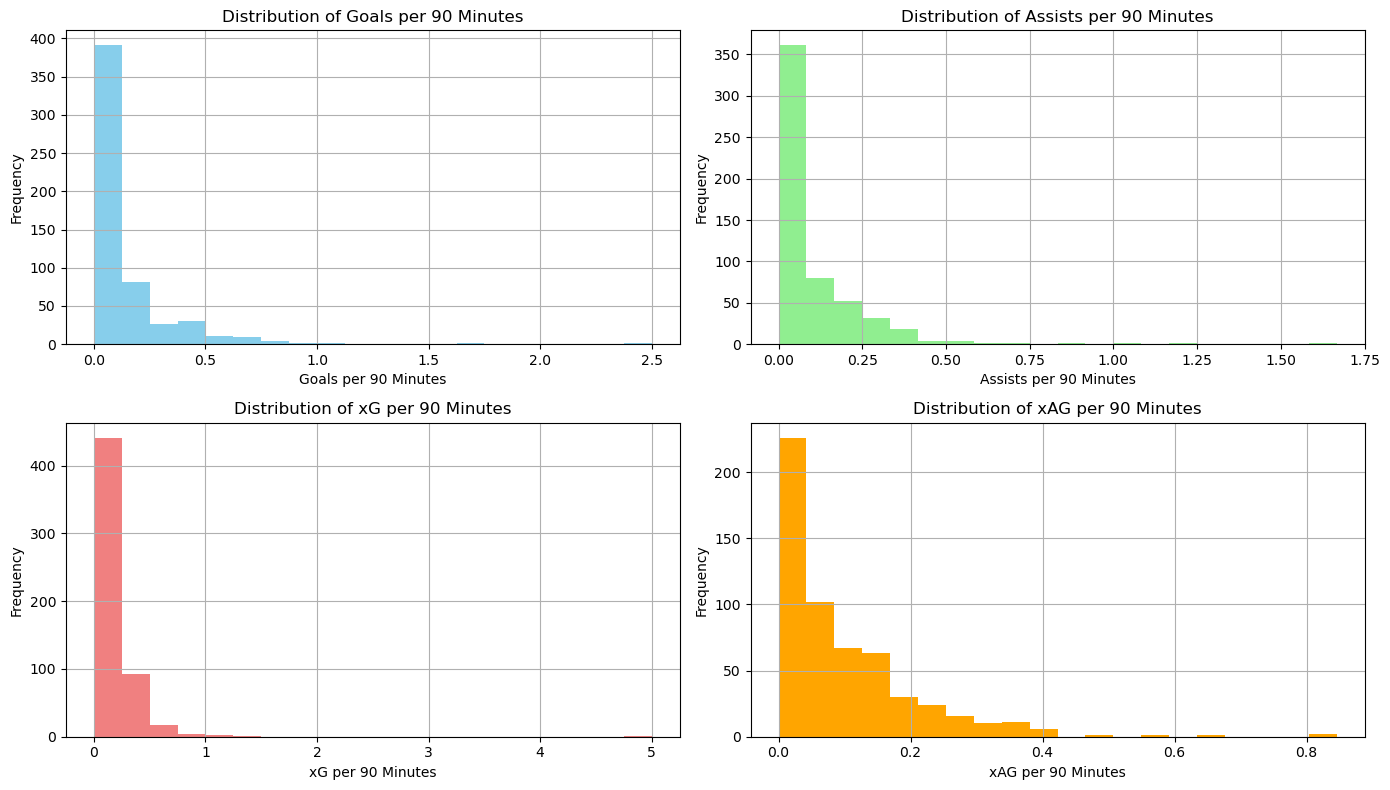

              Player            Squad   Pos  MP  Goals_per_90  Predicted_Goals
230   Erling Haaland  Manchester City    FW  31      0.704225             20.0
576    Ollie Watkins      Aston Villa    FW  37      0.532213             19.0
194       Phil Foden  Manchester City  FWMF  35      0.599369             19.0
516  Dominic Solanke      Bournemouth    FW  38      0.460705             17.0
255   Alexander Isak    Newcastle Utd    FW  30      0.637450             16.0
..               ...              ...   ...  ..           ...              ...
302      Emil Krafth    Newcastle Utd    DF  17      0.000000              0.0
298  Ibrahima Konaté        Liverpool    DF  22      0.000000              0.0
53      Amari'i Bell       Luton Town    DF  21      0.000000              0.0
292     Milos Kerkez      Bournemouth    DF  28      0.000000              0.0
0         Max Aarons      Bournemouth    DF  20      0.000000              0.0

[348 rows x 6 columns]


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new data file
new_data_file_path = 'cleaned_player_performance_stats.csv'
df_prediction = pd.read_csv(new_data_file_path)

# Clean the column headers by removing any suffixes and duplicates
df_prediction.columns = df_prediction.columns.str.split('.').str[0]

# Remove duplicate columns by keeping only the first occurrence of each
df_prediction = df_prediction.loc[:, ~df_prediction.columns.duplicated()]

# Convert the relevant columns to numeric, coercing errors to NaN
columns_to_convert = ['G-PK', '90s', 'Ast', 'xG', 'xAG']
df_prediction[columns_to_convert] = df_prediction[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Recalculate performance per 90 minutes for goals, assists, and expected goals
df_prediction['Goals_per_90'] = df_prediction['G-PK'] / df_prediction['90s']
df_prediction['Assists_per_90'] = df_prediction['Ast'] / df_prediction['90s']
df_prediction['xG_per_90'] = df_prediction['xG'] / df_prediction['90s']
df_prediction['xAG_per_90'] = df_prediction['xAG'] / df_prediction['90s']

# Replace infinite values with NaN and drop them
df_prediction.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values resulting from the replacement
df_prediction.dropna(subset=['Goals_per_90', 'Assists_per_90', 'xG_per_90', 'xAG_per_90'], inplace=True)

# Plot the distribution of per 90 minutes metrics
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
df_prediction['Goals_per_90'].dropna().hist(bins=20, color='skyblue')
plt.title('Distribution of Goals per 90 Minutes')
plt.xlabel('Goals per 90 Minutes')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
df_prediction['Assists_per_90'].dropna().hist(bins=20, color='lightgreen')
plt.title('Distribution of Assists per 90 Minutes')
plt.xlabel('Assists per 90 Minutes')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
df_prediction['xG_per_90'].dropna().hist(bins=20, color='lightcoral')
plt.title('Distribution of xG per 90 Minutes')
plt.xlabel('xG per 90 Minutes')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
df_prediction['xAG_per_90'].dropna().hist(bins=20, color='orange')
plt.title('Distribution of xAG per 90 Minutes')
plt.xlabel('xAG per 90 Minutes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Convert the 'MP' column to numeric
df_prediction['MP'] = pd.to_numeric(df_prediction['MP'], errors='coerce')

# Filter players who played more than 15 games (MP stands for Matches Played)
filtered_players = df_prediction[df_prediction['MP'] > 15].copy()

# Calculate predicted goals based on goals per 90 minutes
filtered_players['Predicted_Goals'] = filtered_players['Goals_per_90'] * filtered_players['90s']

# Sort the players by predicted goals in descending order
top_goal_scorers = filtered_players[['Player', 'Squad', 'Pos', 'MP', 'Goals_per_90', 'Predicted_Goals']].sort_values(by='Predicted_Goals', ascending=False)

# Display the full list of predicted goal scorers
print(top_goal_scorers)

## Predicting and Visualizing Top Goal Scorers for the Upcoming Season

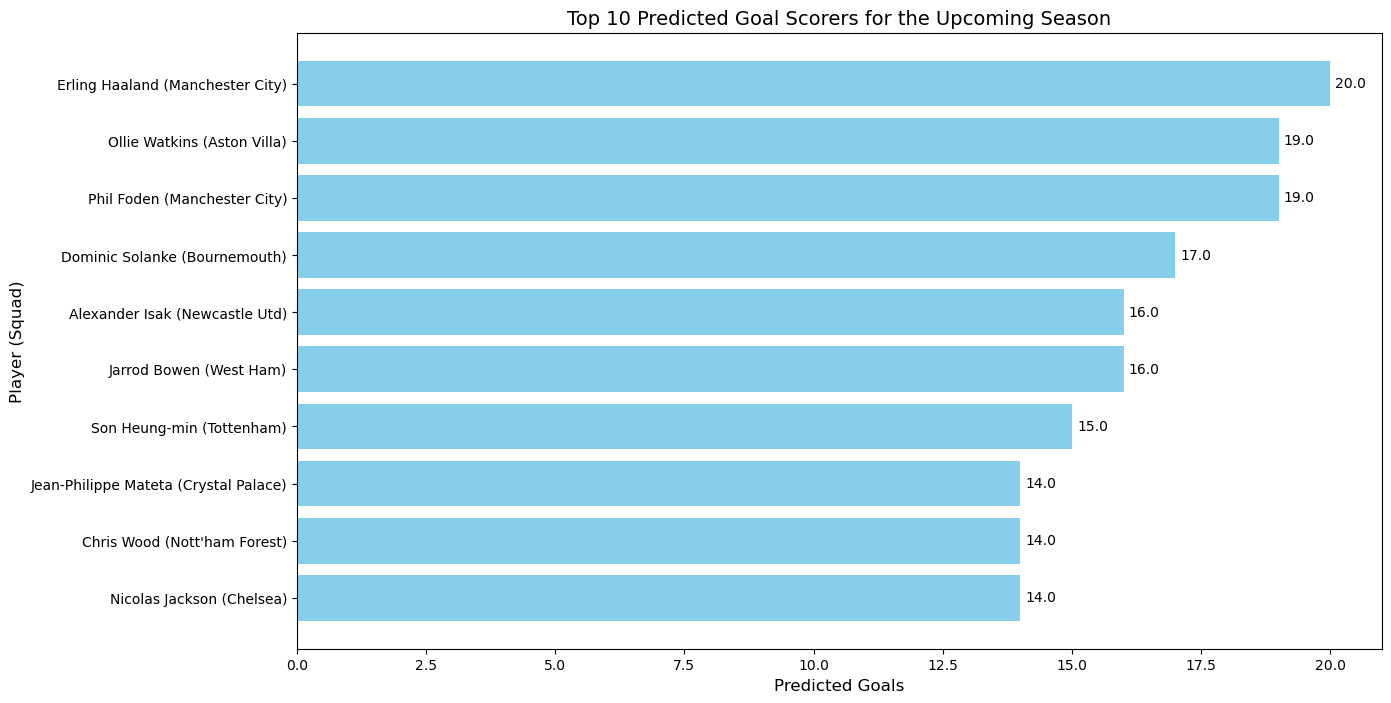

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data file
file_path = 'cleaned_player_performance_stats.csv'
df_prediction = pd.read_csv(file_path)

# Clean the column headers by removing any suffixes and duplicates
df_prediction.columns = df_prediction.columns.str.split('.').str[0]

# Remove duplicate columns by keeping only the first occurrence of each
df_prediction = df_prediction.loc[:, ~df_prediction.columns.duplicated()]

# Convert the relevant columns to numeric, coercing errors to NaN
columns_to_convert = ['G-PK', '90s', 'Ast', 'xG', 'xAG']
df_prediction[columns_to_convert] = df_prediction[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Recalculate performance per 90 minutes for goals, assists, and expected goals
df_prediction['Goals_per_90'] = df_prediction['G-PK'] / df_prediction['90s']
df_prediction['Assists_per_90'] = df_prediction['Ast'] / df_prediction['90s']
df_prediction['xG_per_90'] = df_prediction['xG'] / df_prediction['90s']
df_prediction['xAG_per_90'] = df_prediction['xAG'] / df_prediction['90s']

# Replace infinite values with NaN and drop them
df_prediction.replace([np.inf, -np.inf], np.nan, inplace=True)
df_prediction.dropna(subset=['Goals_per_90', 'Assists_per_90', 'xG_per_90', 'xAG_per_90'], inplace=True)

# Convert the 'MP' column to numeric
df_prediction['MP'] = pd.to_numeric(df_prediction['MP'], errors='coerce')

# Filter players who played more than 15 games (MP stands for Matches Played)
filtered_players = df_prediction[df_prediction['MP'] > 15].copy()

# Calculate predicted goals based on goals per 90 minutes
filtered_players['Predicted_Goals'] = filtered_players['Goals_per_90'] * filtered_players['90s']

# Sort the players by predicted goals in descending order
top_goal_scorers = filtered_players[['Player', 'Squad', 'Pos', 'MP', 'Goals_per_90', 'Predicted_Goals']].sort_values(by='Predicted_Goals', ascending=False)

# Select the top 10 predicted goal scorers for the bar chart
top_10_scorers = top_goal_scorers.head(10).copy()

# Combine player name with squad for better context using .loc to avoid SettingWithCopyWarning
top_10_scorers.loc[:, 'Player_Squad'] = top_10_scorers['Player'] + ' (' + top_10_scorers['Squad'] + ')'

# Create a bar chart with enhancements
plt.figure(figsize=(14, 8))
bars = plt.barh(top_10_scorers['Player_Squad'], top_10_scorers['Predicted_Goals'], color='skyblue')

# Add data labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.1f}', va='center', fontsize=10)

plt.xlabel('Predicted Goals', fontsize=12)
plt.ylabel('Player (Squad)', fontsize=12)
plt.title('Top 10 Predicted Goal Scorers for the Upcoming Season', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the top scorer at the top
plt.show()

## Predicting and Ranking Top Assist Makers for the Upcoming Season

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data file
file_path = 'cleaned_player_performance_stats.csv'
df_prediction = pd.read_csv(file_path)

# Clean the column headers by removing any suffixes and duplicates
df_prediction.columns = df_prediction.columns.str.split('.').str[0]

# Remove duplicate columns by keeping only the first occurrence of each
df_prediction = df_prediction.loc[:, ~df_prediction.columns.duplicated()]

# Convert the relevant columns to numeric, coercing errors to NaN
columns_to_convert = ['G-PK', '90s', 'Ast', 'xG', 'xAG']
df_prediction[columns_to_convert] = df_prediction[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Recalculate performance per 90 minutes for goals, assists, and expected goals
df_prediction['Goals_per_90'] = df_prediction['G-PK'] / df_prediction['90s']
df_prediction['Assists_per_90'] = df_prediction['Ast'] / df_prediction['90s']
df_prediction['xG_per_90'] = df_prediction['xG'] / df_prediction['90s']
df_prediction['xAG_per_90'] = df_prediction['xAG'] / df_prediction['90s']

# Replace infinite values with NaN and drop them
df_prediction.replace([np.inf, -np.inf], np.nan, inplace=True)
df_prediction.dropna(subset=['Goals_per_90', 'Assists_per_90', 'xG_per_90', 'xAG_per_90'], inplace=True)

# Convert the 'MP' column to numeric
df_prediction['MP'] = pd.to_numeric(df_prediction['MP'], errors='coerce')

# Filter players who played more than 15 games (MP stands for Matches Played)
filtered_players = df_prediction[df_prediction['MP'] > 15].copy()

# Calculate predicted assists based on assists per 90 minutes
filtered_players['Predicted_Assists'] = filtered_players['Assists_per_90'] * filtered_players['90s']

# Sort the players by predicted assists in descending order
top_assist_makers = filtered_players[['Player', 'Squad', 'Pos', 'MP', 'Assists_per_90', 'Predicted_Assists']].sort_values(by='Predicted_Assists', ascending=False)

# Display the top predicted assist makers
print(top_assist_makers.head(10))

                 Player            Squad   Pos  MP  Assists_per_90  \
576       Ollie Watkins      Aston Villa    FW  37        0.364146   
430         Cole Palmer          Chelsea  FWMF  33        0.379310   
602     Martin Ødegaard          Arsenal    MF  35        0.291545   
487       Mohamed Salah        Liverpool    FW  32        0.354610   
270     Brennan Johnson        Tottenham    FW  32        0.431034   
225         Pascal Groß         Brighton  MFDF  36        0.289017   
219      Anthony Gordon    Newcastle Utd    FW  35        0.311526   
208  Morgan Gibbs-White  Nott'ham Forest  MFFW  37        0.284900   
243       Son Heung-min        Tottenham    FW  35        0.306748   
550     Kieran Trippier    Newcastle Utd    DF  28        0.403226   

     Predicted_Assists  
576               13.0  
430               11.0  
602               10.0  
487               10.0  
270               10.0  
225               10.0  
219               10.0  
208               10.0  
243 

## Predicting and Visualizing Top Assist Makers for the Upcoming Season

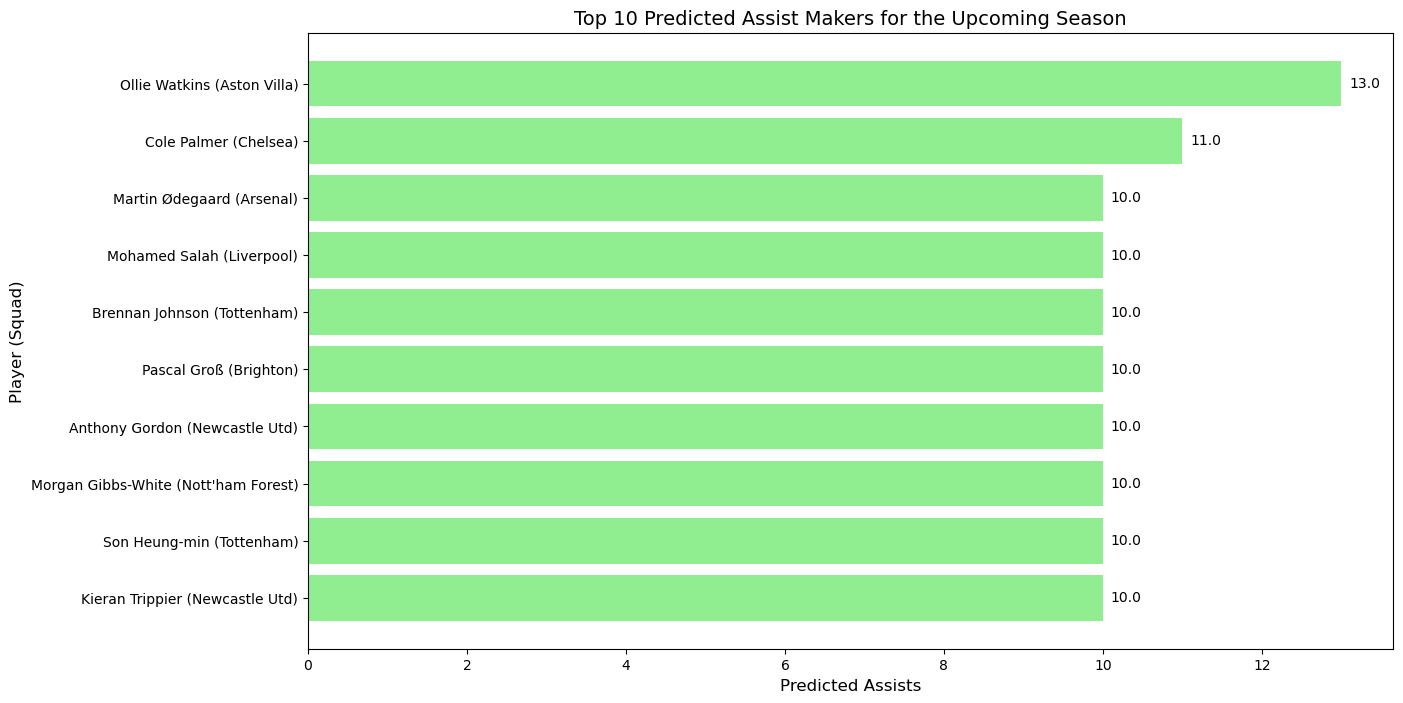

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data file
file_path = 'cleaned_player_performance_stats.csv'
df_prediction = pd.read_csv(file_path)

# Clean the column headers by removing any suffixes and duplicates
df_prediction.columns = df_prediction.columns.str.split('.').str[0]

# Remove duplicate columns by keeping only the first occurrence of each
df_prediction = df_prediction.loc[:, ~df_prediction.columns.duplicated()]

# Convert the relevant columns to numeric, coercing errors to NaN
columns_to_convert = ['G-PK', '90s', 'Ast', 'xG', 'xAG']
df_prediction[columns_to_convert] = df_prediction[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Recalculate performance per 90 minutes for goals, assists, and expected goals
df_prediction['Goals_per_90'] = df_prediction['G-PK'] / df_prediction['90s']
df_prediction['Assists_per_90'] = df_prediction['Ast'] / df_prediction['90s']
df_prediction['xG_per_90'] = df_prediction['xG'] / df_prediction['90s']
df_prediction['xAG_per_90'] = df_prediction['xAG'] / df_prediction['90s']

# Replace infinite values with NaN and drop them
df_prediction.replace([np.inf, -np.inf], np.nan, inplace=True)
df_prediction.dropna(subset=['Goals_per_90', 'Assists_per_90', 'xG_per_90', 'xAG_per_90'], inplace=True)

# Convert the 'MP' column to numeric
df_prediction['MP'] = pd.to_numeric(df_prediction['MP'], errors='coerce')

# Filter players who played more than 15 games (MP stands for Matches Played)
filtered_players = df_prediction[df_prediction['MP'] > 15].copy()

# Calculate predicted assists based on assists per 90 minutes
filtered_players['Predicted_Assists'] = filtered_players['Assists_per_90'] * filtered_players['90s']

# Sort the players by predicted assists in descending order
top_assist_makers = filtered_players[['Player', 'Squad', 'Pos', 'MP', 'Assists_per_90', 'Predicted_Assists']].sort_values(by='Predicted_Assists', ascending=False)

# Select the top 10 predicted assist makers for the bar chart
top_10_assist_makers = top_assist_makers.head(10).copy()

# Combine player name with squad for better context
top_10_assist_makers['Player_Squad'] = top_10_assist_makers['Player'] + ' (' + top_10_assist_makers['Squad'] + ')'

# Create a bar chart for the top 10 predicted assist makers
plt.figure(figsize=(14, 8))
bars = plt.barh(top_10_assist_makers['Player_Squad'], top_10_assist_makers['Predicted_Assists'], color='lightgreen')

# Add data labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.1f}', va='center', fontsize=10)

plt.xlabel('Predicted Assists', fontsize=12)
plt.ylabel('Player (Squad)', fontsize=12)
plt.title('Top 10 Predicted Assist Makers for the Upcoming Season', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the top player at the top
plt.show()

## Analyzing Player Performance: Identifying Overperformers and Underperformers Based on Goals vs. Expected Goals (xG)

In [21]:
import pandas as pd

# Load the dataset
file_path = 'cleaned_player_performance_stats.csv'
df = pd.read_csv(file_path)

# Convert the relevant columns to numeric, coercing errors to NaN
df['Gls'] = pd.to_numeric(df['Gls'], errors='coerce')
df['xG'] = pd.to_numeric(df['xG'], errors='coerce')

# Calculate the difference between actual goals and expected goals (xG)
df['Goals_vs_xG'] = df['Gls'] - df['xG']

# Sort players based on the difference to identify overperformers and underperformers
df_sorted = df[['Player', 'Squad', 'Pos', 'Gls', 'xG', 'Goals_vs_xG']].sort_values(by='Goals_vs_xG', ascending=False)

# Display the top overperformers
top_overperformers = df_sorted.head(10)

# Remove rows with missing data to clean the dataset
df_cleaned = df_sorted.dropna()

# Display the top underperformers after cleaning
top_underperformers_cleaned = df_cleaned.tail(10)

# Output the results
print("Top Overperformers (Actual Goals vs. xG):")
print(top_overperformers)
print("\nTop Underperformers (Actual Goals vs. xG):")
print(top_underperformers_cleaned)

Top Overperformers (Actual Goals vs. xG):
                   Player            Squad   Pos   Gls    xG  Goals_vs_xG
194            Phil Foden  Manchester City  FWMF  19.0  10.3          8.7
248    Callum Hudson-Odoi  Nott'ham Forest  FWMF   8.0   2.7          5.3
343  Jean-Philippe Mateta   Crystal Palace    FW  16.0  10.9          5.1
243         Son Heung-min        Tottenham    FW  17.0  12.0          5.0
276            Diogo Jota        Liverpool    FW  10.0   5.3          4.7
412         Michael Olise   Crystal Palace  FWMF  10.0   5.5          4.5
71           Jarrod Bowen         West Ham    FW  16.0  11.6          4.4
240        Hwang Hee-chan           Wolves  FWMF  12.0   7.7          4.3
551      Leandro Trossard          Arsenal  FWMF  12.0   7.9          4.1
5          Elijah Adebayo       Luton Town    FW  10.0   5.9          4.1

Top Underperformers (Actual Goals vs. xG):
                    Player      Squad   Pos   Gls    xG  Goals_vs_xG
266             João Pedro   Br

## Visualizing Overperformers and Underperformers: Actual Goals vs. Expected Goals (xG)

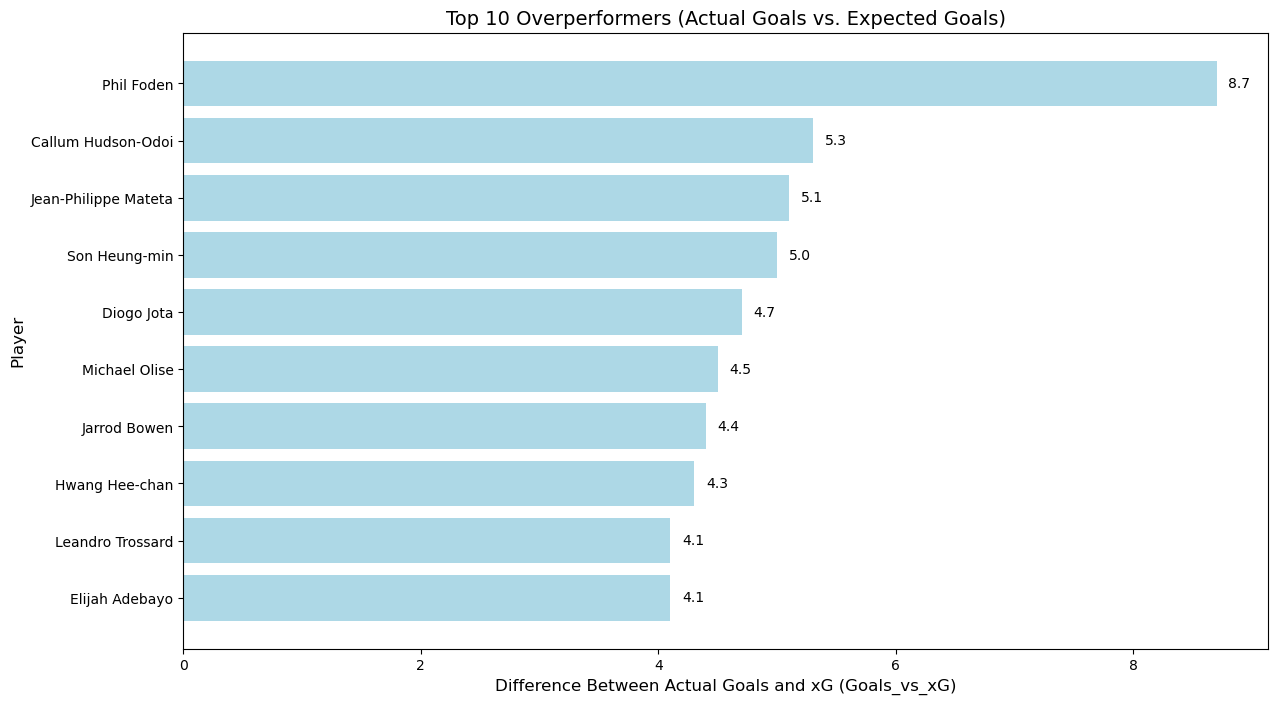

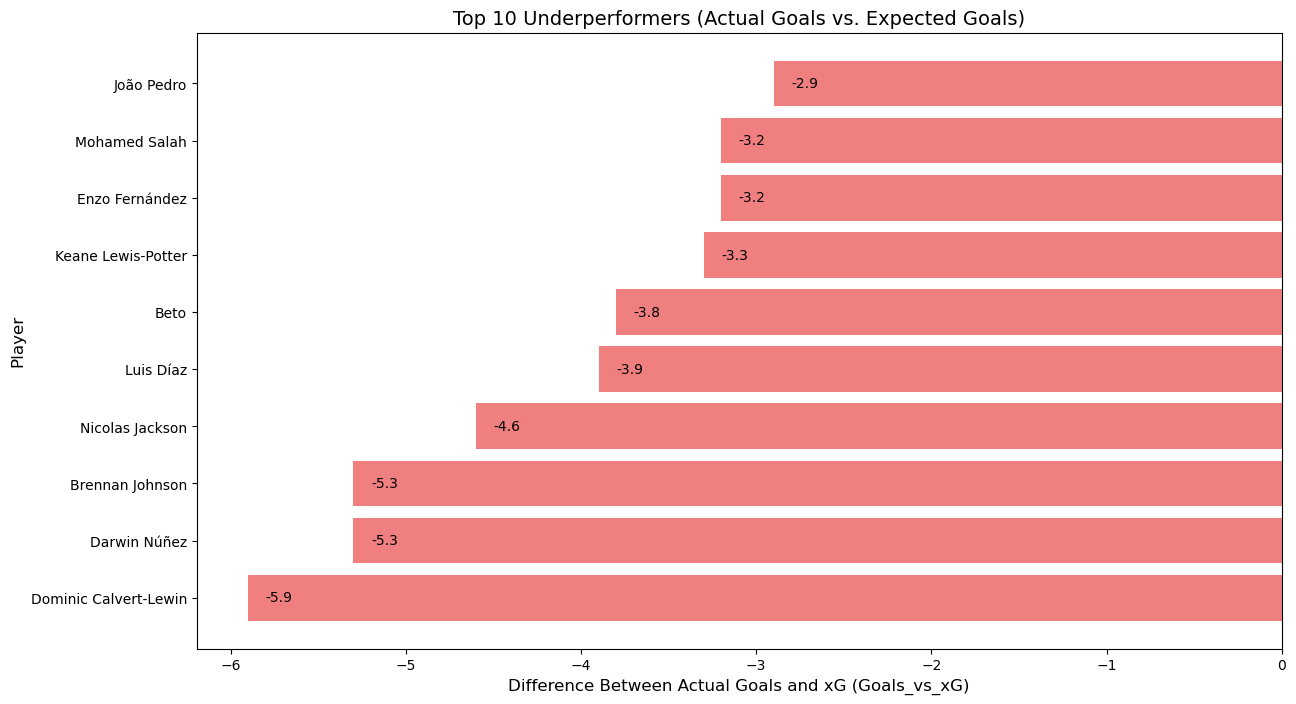

In [23]:
import matplotlib.pyplot as plt

# Create a bar chart for the top 10 overperformers
plt.figure(figsize=(14, 8))
bars = plt.barh(top_overperformers['Player'], top_overperformers['Goals_vs_xG'], color='lightblue')

# Add data labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.1f}', va='center', fontsize=10)

plt.xlabel('Difference Between Actual Goals and xG (Goals_vs_xG)', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.title('Top 10 Overperformers (Actual Goals vs. Expected Goals)', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the top overperformer at the top
plt.show()

# Create a bar chart for the top 10 underperformers
plt.figure(figsize=(14, 8))
bars = plt.barh(top_underperformers_cleaned['Player'], top_underperformers_cleaned['Goals_vs_xG'], color='lightcoral')

# Add data labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.1f}', va='center', fontsize=10)

plt.xlabel('Difference Between Actual Goals and xG (Goals_vs_xG)', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.title('Top 10 Underperformers (Actual Goals vs. Expected Goals)', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the top underperformer at the top
plt.show()